In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Precursors to Forecasting Models

In [2]:
df = pd.read_csv('data/macrodata.csv', index_col=0, parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


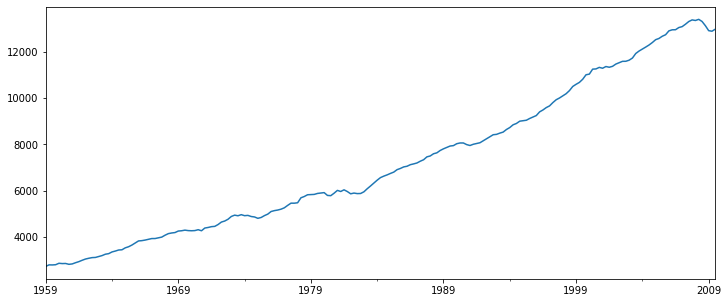

In [4]:
df.realgdp.plot(figsize=(12, 5))

## Hodrick-Prescott Filter

Separates time series into a **trend component** and **cyclical component**

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
gdp_cycle, gdp_trend = hpfilter(df.realgdp, lamb=1600)

In [7]:
df['gdp_trend'] = gdp_trend
df['gdp_cycle'] = gdp_cycle

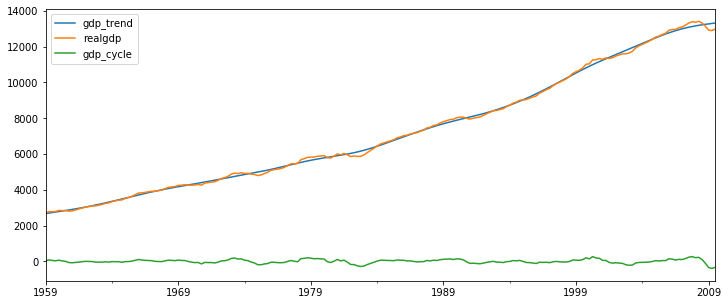

In [8]:
df[['gdp_trend', 'realgdp', 'gdp_cycle']].plot(figsize=(12, 5))

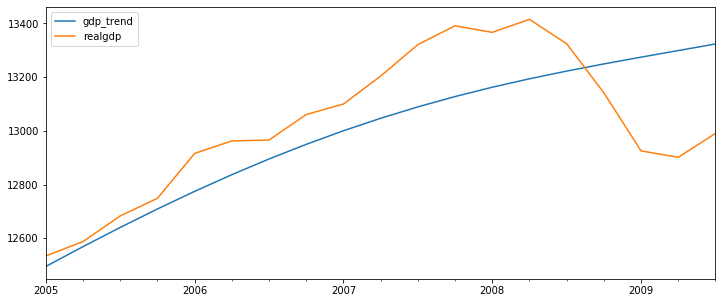

In [9]:
df[['gdp_trend', 'realgdp']]['2005-01-01':].plot(figsize=(12, 5))

## Error-Trend-Seasonality (ETS) Models

A class of time series models such as:

- Exponential smoothing
- Trend methods models
- ETS decomposition

ETS decomposition is a great way to visualize data based off ETS. There are two types: additive and multiplicative. This depends on whether we thing the trend is changing at a constant rate (additive) or at an accelerated rate (multiplicative).

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
df2 = pd.read_csv('data/airline_passengers.csv', index_col=0, parse_dates=True)
df2 = df2.dropna()

In [12]:
df2.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


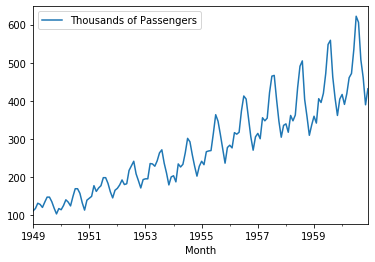

In [13]:
df2.plot()

In [14]:
result = seasonal_decompose(df2['Thousands of Passengers'], model='multiplicative')

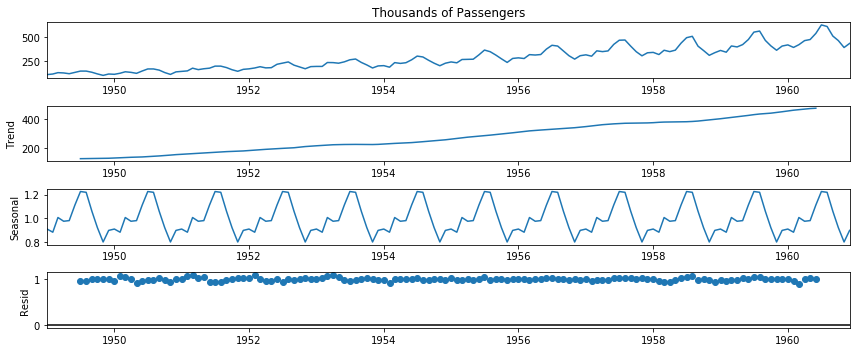

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 5)
result.plot();

## Moving Averages

We can use moving averages as a generalized model for time series data. It's not typically a good use for prediction. There are a few ways to do moving averages:

- Simple Moving Averages
    - Smaller windows lead to more noise than signal
    - Always lag by size of window
    - Will never reach peaks or valleys in data due to averaging
    - They don't really inform you about possible future behavior, but rather describes trends in the data
    - Extreme historical values skew SMA
- Exponentially Weighted Moving Averages (**EWMA**)
    - Reduced lag effect
    - Weight applied to most recent values depend on parameters used in EWMA

In [16]:
# df3 = pd.read_csv('data/airline_passengers.csv', index_col=0)
# df3.dropna(inplace=True)
# df3.index = pd.to_datetime(df3.index)
df3 = df2.copy() # airlines dataset

In [17]:
df3.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
# Simple moving average
df3['6-month-SMA'] = df3['Thousands of Passengers'].rolling(window=6).mean()
df3['12-month-SMA'] = df3['Thousands of Passengers'].rolling(window=12).mean()

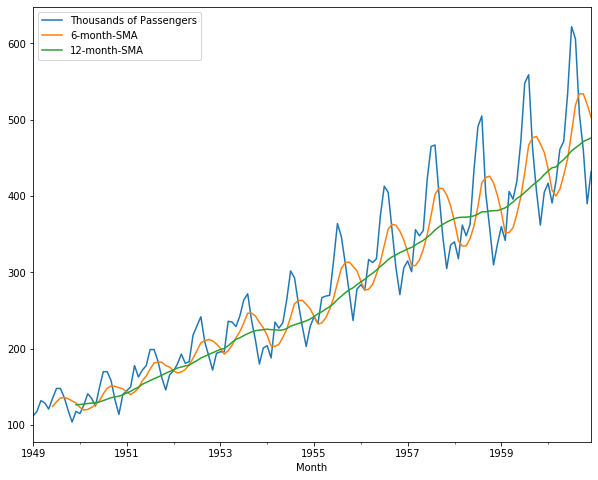

In [19]:
df3.plot(figsize=(10, 8))

In [20]:
# Exponentially Weighted Moving Average
df3['EWMA-12'] = df3['Thousands of Passengers'].ewm(span=12).mean()

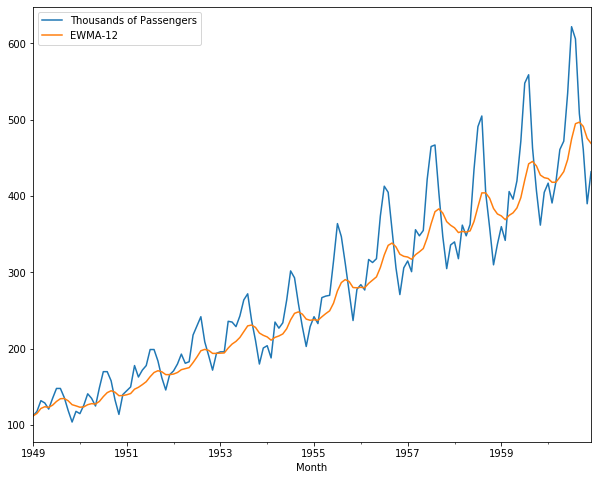

In [21]:
df3[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10, 8))

## Holt-Winters

Holt-Winters is used to model and predict time series data. It comprises of three smoothing equations:

- Level
- Trend
- Seasonal

The type of exponential smoothing is based on how many smoothing equations are used:

- Single Exponential Smoothing (Level only)
- Double Exponential Smoothing (Level + Trend)
- Triple Exponential Smoothing (Level + Trend + Seasonal)

Two variations due to seasonal component:

- Additive
- Multiplicative

In [22]:
df4 = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df4.dropna(inplace=True)

# Simple Moving Average - for level
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2 / (span + 1)

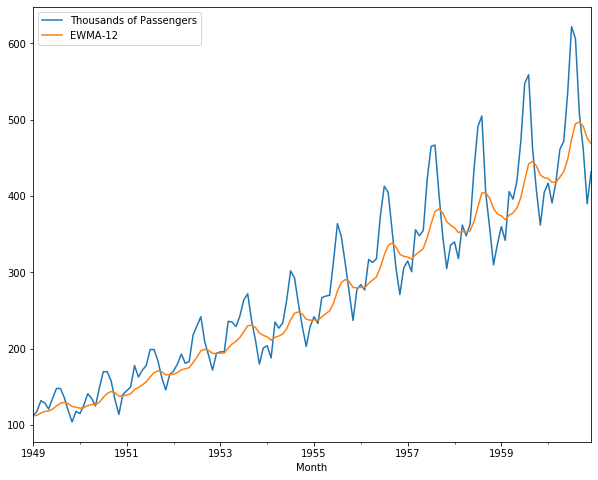

In [23]:
# Comparing EWMA
df4['EWMA-12'] = df4['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()
df4.plot(figsize=(10, 8))

c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


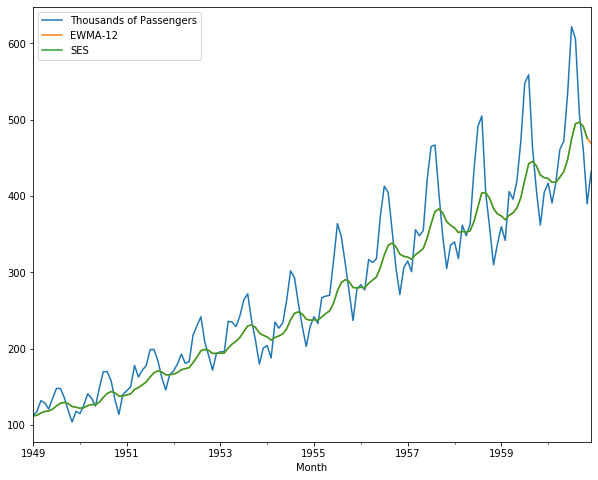

In [24]:
# Simple (Single) Exponential Smoothing (SES) -- Same as EWMA
model = SimpleExpSmoothing(df4['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
df4['SES'] = fitted_model.fittedvalues.shift(-1) # shift by 1 to match the data
df4.plot(figsize=(10, 8))

c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


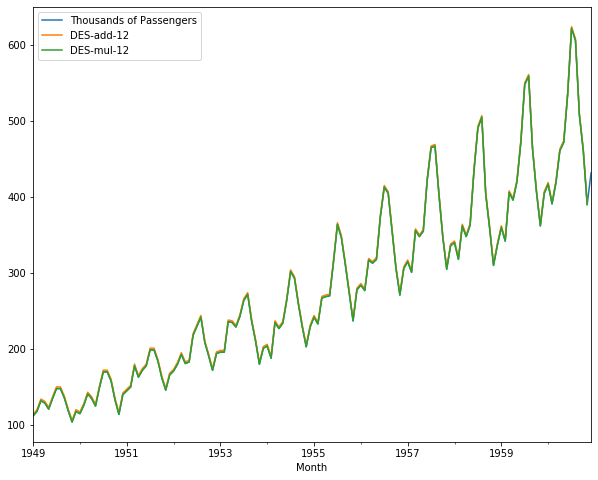

In [25]:
# Double Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df4['DES-add-12'] = ExponentialSmoothing(df4['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df4['DES-mul-12'] = ExponentialSmoothing(df4['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

df4[['Thousands of Passengers', 'DES-add-12', 'DES-mul-12']].plot(figsize=(10, 8))

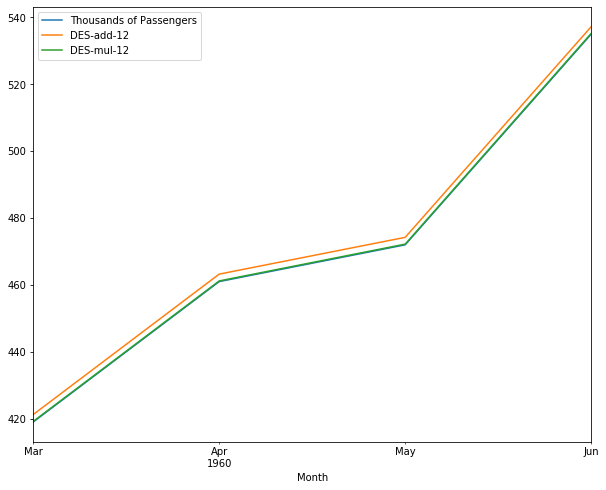

In [26]:
df4.loc['1960-03-01':'1960-06-01', ['Thousands of Passengers', 'DES-add-12', 'DES-mul-12']].plot(figsize=(10, 8))

c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


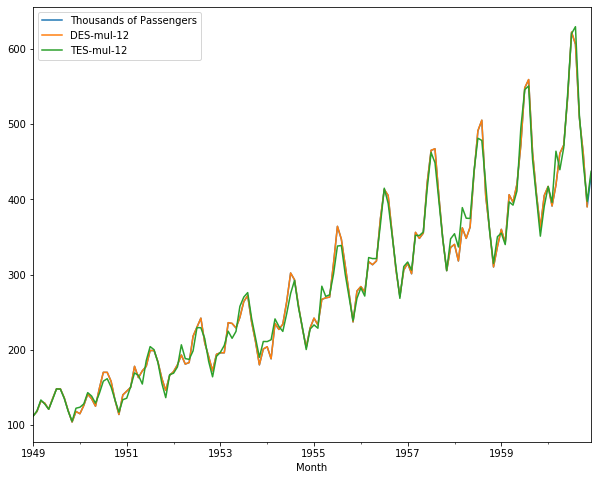

In [27]:
# Triple Exponential Smoothing (No longer have to worry about shifting fitted values due to seasonality)
df4['TES-add-12'] = ExponentialSmoothing(df4['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df4['TES-mul-12'] = ExponentialSmoothing(df4['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

df4[['Thousands of Passengers', 'DES-mul-12', 'TES-mul-12']].plot(figsize=(10, 8))

## Quick Exercises

**Problem**: We are given data from FRED on Industrial Production Index for Electricity and Gas Utilities from Jan 1970 to Dec 1989 ([data source](https://fred.stlouisfed.org/series/IPG221A2N)). Generate the following:

- A 12-month Simple Moving Average model on the dataset (data aggregated at month start)
- An EWMA with span = 12
- A Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models
- Plot the result for all 3
- Calculate RMSE for each model

In [28]:
fred_data = pd.read_csv('data/EnergyProduction.csv', index_col='DATE', parse_dates=True)
fred_data.index.freq = 'MS'
fred_data.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


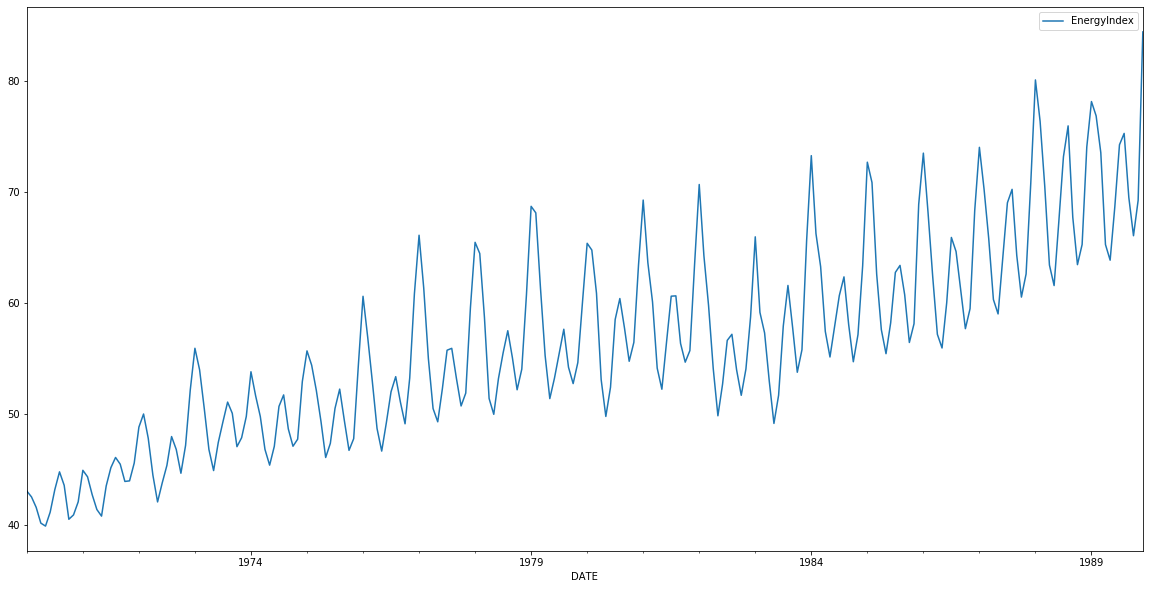

In [29]:
fred_data.plot(figsize=(20, 10))

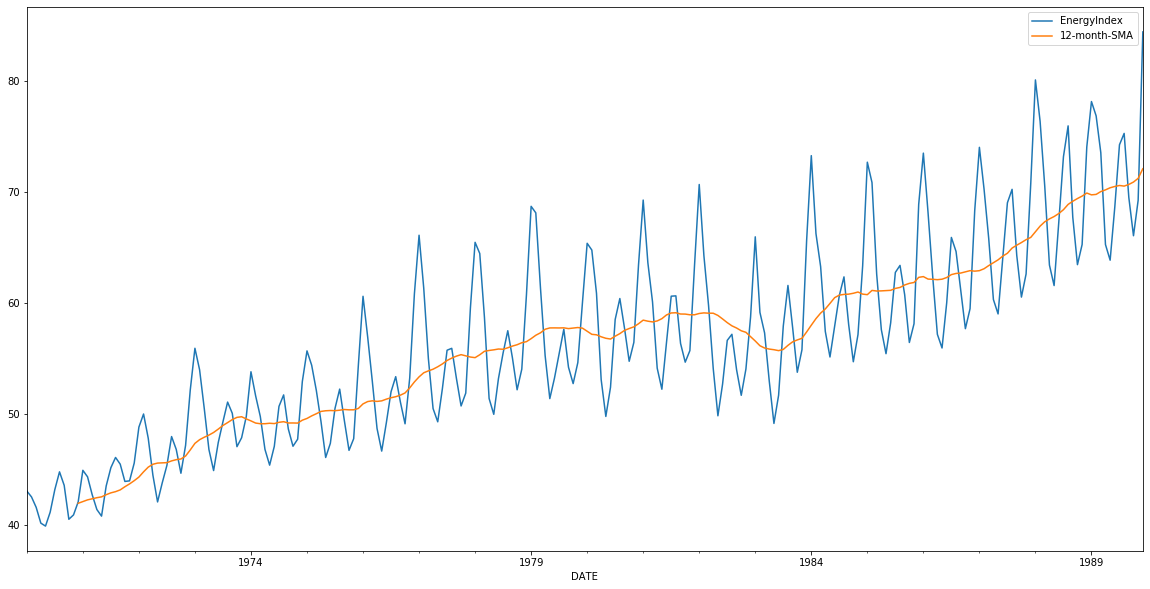

In [30]:
fred_data['12-month-SMA'] = fred_data.EnergyIndex.rolling(window=12).mean()
fred_data.plot(figsize=(20, 10))

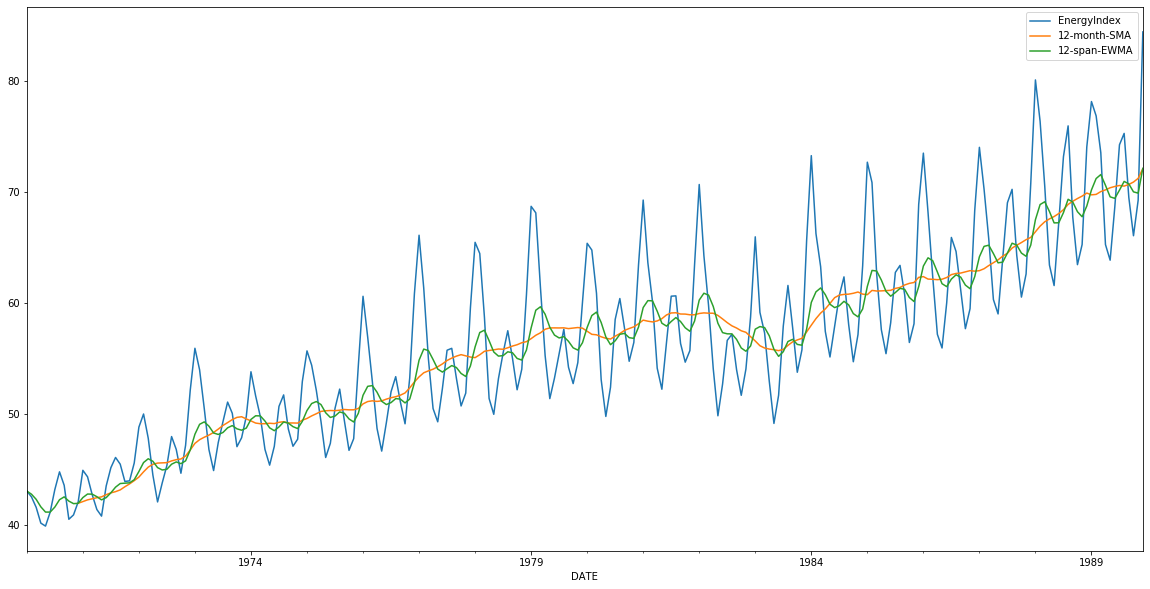

In [31]:
fred_data['12-span-EWMA'] = fred_data.EnergyIndex.ewm(span=12).mean()
fred_data.plot(figsize=(20, 10))

c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\Users\Ariel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


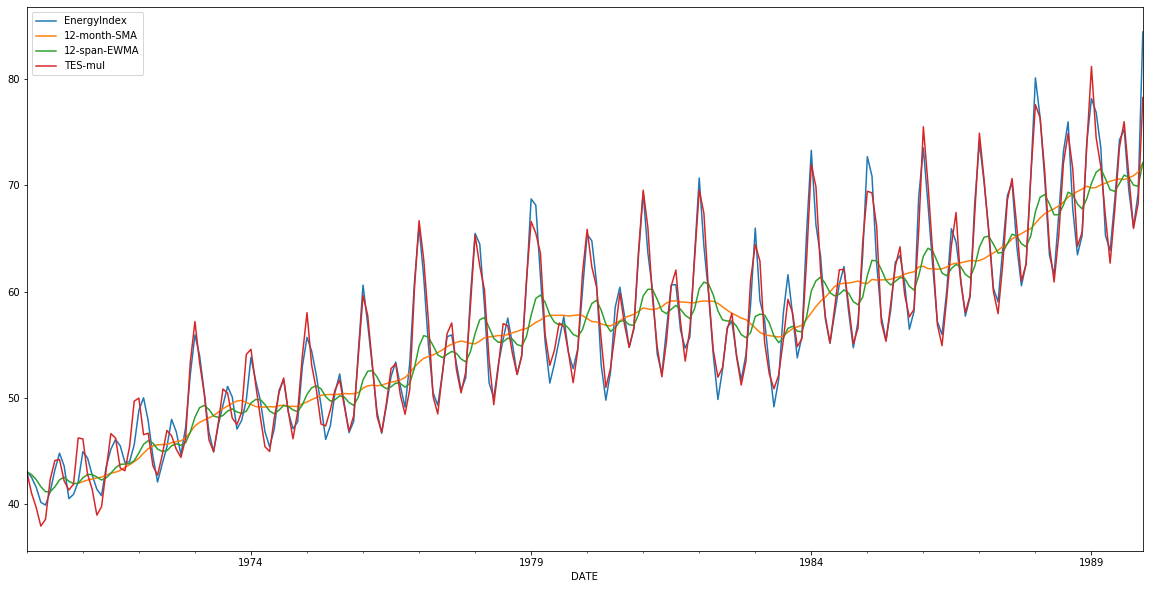

In [32]:
fred_data['TES-mul'] = ExponentialSmoothing(fred_data.EnergyIndex, trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
fred_data.plot(figsize=(20, 10))

In [33]:
RMSE_SMA = np.sqrt(((fred_data.EnergyIndex - fred_data['12-month-SMA'])**2).mean())
RMSE_EWMA = np.sqrt(((fred_data.EnergyIndex - fred_data['12-span-EWMA'])**2).mean())
RMSE_HW = np.sqrt(((fred_data.EnergyIndex - fred_data['TES-mul'])**2).mean())

print('-'*10, 'Summary Statistics', '-'*10)
print('SMA RMSE: {:,.4f}'.format(RMSE_SMA))
print('EWMA RMSE: {:,.4f}'.format(RMSE_EWMA))
print('Holt-Winters RMSE: {:,.4f}'.format(RMSE_HW))

---------- Summary Statistics ----------
SMA RMSE: 4.8073
EWMA RMSE: 4.2304
Holt-Winters RMSE: 1.4548


# General Forecasting Models

General forecasting procedure:

- Choose a model
- Split data into train / test sets
- Fit model on training set(s)
- Evaluate on test set
- Re-fit model on entire data set
- Forecast for future data